# 데이터 준비

In [20]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 클래스 추출

In [21]:
# 데이터 종류 확인
print(pd.unique(data['Species']))

['setosa' 'versicolor' 'virginica']


## 입력, 출력 데이터 

In [22]:
X_data = data.drop('Species', axis = 1)
y_data = data['Species']

## train, test 데이터 분할

In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_data, y_data,stratify = y_data,  random_state = 41)

## 데이터 정규화

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k-최근접 알고리즘 사용하여 데이터 분류

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


## 테스트 데이터의 5개 분류

In [36]:
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'virginica']
['versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa']


## 최적화해보기

n_neighbors : 1
1.0
0.9210526315789473
n_neighbors : 2
0.9910714285714286
0.9210526315789473
n_neighbors : 3
0.9821428571428571
0.9210526315789473
n_neighbors : 4
0.9821428571428571
0.9473684210526315
n_neighbors : 5
0.9821428571428571
0.9473684210526315
n_neighbors : 6
0.9732142857142857
0.9473684210526315
n_neighbors : 7
0.9821428571428571
0.9736842105263158
n_neighbors : 8
0.9732142857142857
0.9736842105263158
n_neighbors : 9
0.9642857142857143
0.9736842105263158


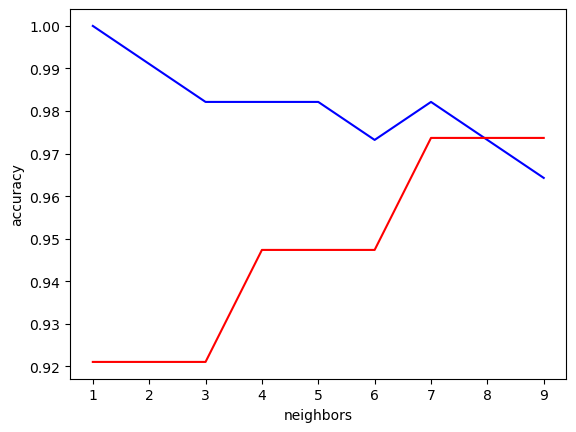

In [39]:
import matplotlib.pyplot as plt
train_acc = []
test_acc = []
for i in range(1,10):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(train_scaled, train_target)
    print('n_neighbors : '+ str(i))
    train_acc.append(kn.score(train_scaled, train_target))
    test_acc.append(kn.score(test_scaled, test_target))
    print(kn.score(train_scaled, train_target))
    print(kn.score(test_scaled, test_target))

i = [1,2,3,4,5,6,7,8,9]
plt.plot(i, train_acc, 'b')
plt.plot(i, test_acc, 'r') 
#plt.title('n_neighbors = {}'.format(n))
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

# 로지스틱 회귀 분류

In [37]:
#로지스틱 회귀 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9732142857142857
0.9210526315789473


In [38]:
print(lr.classes_)
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'virginica']
['versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa']


# 확률적 경사 하강법

In [40]:
from sklearn.linear_model import SGDClassifier
# 훈련
sc = SGDClassifier(loss='log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
# 평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9732142857142857
0.9210526315789473


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [41]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


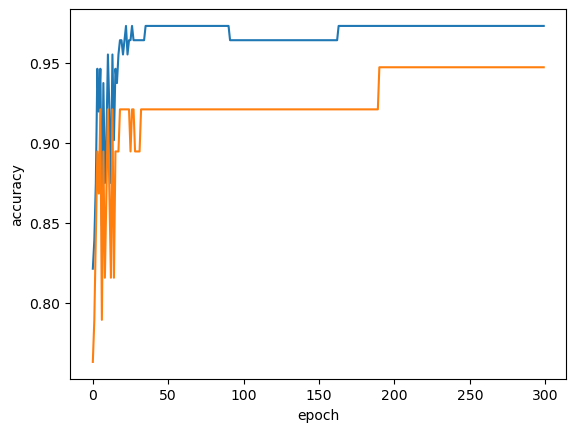

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()